For this Qiskit in Classroom module, students must have a working python environment with the following packages installed:
- qiskit v $\geq$ 1.3
- qiskit_ibm_runtime v $\geq$ 0.29.0
- qiskit-aer v $\geq$ 15.0
- qiskit.visualization

To set up and install the packages above, see the guidance on IBM Quantum's [Documentation page](https://docs.quantum.ibm.com/guides/install-qiskit).
In order to run jobs on real quantum computers, students will need to set up an account with IBM Quantum. This can be done by following the steps outlined on [Documentation here](https://docs.quantum.ibm.com/guides/setup-channel).

# The Stern-Gerlach experiment using quantum computers

## The experiment
In the early 1900's, evidence of quantized behavior on atomic scales was mounting. Many successful interpretations of data like Max Planck's explanation of the ultraviolet catastrophe, and experiments like the one by Otto Stern and Walther Gerlach were critical in convincing the world that a system of quantum mechanics was necessary, and that certain physical phenomena are quantized. In the case of the Stern-Gerlach experiment (conceived by Stern in 1921 and carried out by Stern and Gerlach in 1922), the goal was to check for the quantization of angular momentum in atoms.

Around that same time a prevalent model for the atom was Bohr-Sommerfeld model, which was an extension to the Bohr model, and like the Bohr model, it predicted that electrons existing in certain quantized orbits similar to planets orbiting the sun.

![Diagram of Bohr-Sommerfeld model. A central dot represents the nucleus of an atom. Circles or ellipses around that point represent atomic orbitals, looking very much like planetary orbits around the sun. Higher-energy orbits are farther from the nucleus.](/learning/images/courses/qiskit-in-classroom-quantum-mechanics/stern-gerlach-measurements-with-qiskit/sg-device.avif)

Although ultimately this treatment would turn out to be insufficient to explain quantum mechanical behavior of the atom, broadly, it did predict many observed phenomenon, like the discrete spectral lines of atoms. The quantized orbits of electrons with specific energies corresponds to quantized values of angular momentum. It is this orbital angular momentum that Stern and Gerlach sought to observe in their experiment, though the experiment applies to any type of quantized angular momentum, including spin. You may often hear of the Stern-Gerlach experiment applied to spins. The focus of the original experiment was on orbital angular momentum simply because George Uhlenbeck and Samuel Goudsmit would not theorize the existence of spin until 1925.

Regardless of the type of angular momentum, a charge with angular momentum has a magnetic moment. In the classical treatment of orbital motion, one would expect a particle of charge $q$, mass $m$ and angular momentum $\vec{L}$ to have a magnetic moment $\mu$ given by

$$\vec{\mu} = \frac{q}{2m}\vec{L}$$

It turns out that almost the same formula holds for quantum mechanical angular momentum, with the caveat of adding a numerical ratio related to the type of angular momentum, called the g-factor $g$. When combining different types of angular momentum, or generalizing to an arbitrary type, one often sees $\vec{J}$ used instead of $\vec{L}$, so we write:

$$\vec{\mu} = \frac{gq}{2m}\vec{J}$$

For classical objects $g=1$. For electrons, $g\approx 2$, and there are many values for various nuclei and subatomic particles. The main point here is that quantized angular momentum means a quantized magnetic moment!

This magnetic momentum will experience a torque in a magnetic field:

$$\vec{\tau}=\vec{\mu}\times \vec{B}$$

And it will experience a force in a magnetic field with a non-zero gradient:

$$\vec{F} = \nabla(\vec{\mu}\cdot\vec{B})$$

We will often consider the above expression one component at a time, so it may be convenient to think of its $z$-component:

$$F_z = \mu_z \frac{dB_z}{dz}$$

Combining expressions, we can obtain

$$F_z = \frac{gq}{2m} \frac{dB_z}{dz} J_z$$

Stern and Gerlach did not know about the $g$ factor, but even with it in the expression, we have a force equal to several known or measurable constants times an angular momentum. So using a magnetic field with a known gradient, and measuring the deflection of a particle as it passes through the field, we should get information about the angular momentum. This is the crux of the Stern Gerlach experiment.

![Silver atoms travelling through an inhomogeneous magnetic field, and being deflected up or down depending on their spin. Classically, we would expect a continuous distribution on the screen, but in the experiment we see two distinct points.](/learning/images/courses/qiskit-in-classroom-quantum-mechanics/stern-gerlach-measurements-with-qiskit/sg-device.avif)


Fig. Stern–Gerlach experiment[1]: Silver atoms travelling through an inhomogeneous magnetic field, and being deflected up or down depending on their spin. Classically, we would expect a continuous distribution on the screen, but in the experiment we see two distinct points.

Neutral silver atoms were heated in an oven. As a beam of silver atoms streamed from the oven, beam collimators were used to select only atoms travelling near the center of the inhomogeneous magnetic field. Of course, some atoms deviate a bit to the left or right, and experience a weaker gradient in the field, or no gradient at all. So, we are not overly concerned with the behavior of atoms far to the left or right. We are interested in what happens to the atoms that travel down the center of the channel, where the magnetic field gradient will yield a force deflecting the atoms in the $z$-direction only.

## What should we expect, classically?

How would these atoms behave if they were exactly like bulky, classical magnets? You can do the experiment. Imagine firing tiny neodymium magnets past a large, powerful magnet. The orientation of the tiny magnets is random. But as they pass the large magnet, they quickly re-orient themselves to align with the field, and become attracted to the large magnet. The vast majority of tiny magnets are deflected toward the large magnet. The very astute observer might question, "What about energy conservation?"

Indeed, a magnetic moment in an external magnetic field has a potential energy associated with it:

$$U = -\vec{\mu}\cdot \vec{B} = -\mu B \cos(\theta)$$

So, if a magnetic moment were to rotate in the external magnetic field, there would be a change in energy given by:

$$\Delta U = U_f - U_i = -\mu B (\cos(\theta_f) - \cos(\theta_i)).$$

In the special case of a small magnet perfectly anti-aligned with the external field flipping over and aligning with it, this would correspond to a decrease in potential energy:

$$\Delta U = U_f - U_i = -\mu B (\cos(0) - \cos(\pi)) = -2\mu B.$$

So where does that energy go? A classical magnet like a small neodymium refrigerator magnet has many particles and can dissipate almost any quantity of energy as heat. The initial and final angles between the magnetic moment and the external magnetic field could be anything, and at least the initial orientation would be random. So a different amount of energy would be dissipated as heat for each tiny magnet. But classically this is no problem, since an ensemble of classical particles can dissipate any amount of energy as heat.

## What should we expect applying classical thinking to atomic scales?

At the very least this is not the same for atomic-scale magnets, because there are fewer particles in play, fewer degrees of freedom through which energy may be dissipated. The proposals of early quantum mechanics suggested further that the energy that can be absorbed by an individual particle, such as the electron, would be quantized, meaning an electron could only absorb a few specific amounts of energy. Since the random initial orientations would require the dissipation of random amounts of energy, this should not be possible for a system with quantized energy levels. The excess energy could not be dissipated as heat. So what would happen instead?


### Check-in question

Explain what you think would happen in a situation like that described above. That is, you have an atomically small magnet that cannot dissipate any energy as heat. So, any initial magnetic potential energy must remain in the system. Yet, a torque is applied by an external magnetic field, which attempts to rotate the small magnet to align with the external field. What happens?

<details>
<summary>Answer:</summary>

The tiny magnetic moment would rotate toward alignment with the external field. But when it momentarily aligns, it would have rotational kinetic energy that would keep it rotating past the field and back out of alignment. This behavior can even be seen in large classical magnets. But in those classical systems, the oscillation of the small magnetic moment eventually stops as energy is dissipated into heat. But in a system with no such dissipative mechanism, the oscillation should continue indefinitely.

</details>

### Check-in question

Given the behavior expected in the answer above, what distribution of magnetic particles would you expect to see on the screen?

<details>
<summary>Answer:</summary>

A smooth distribution from some maximum deflection toward the stronger side of the magnetic field (those particles that happened to start out aligned with the external field) to some maximum deflection toward the weaker side of the field (those particles that started out anti-aligned with the external field), and every deflection in between, corresponding to every initial orientation between those extrema.

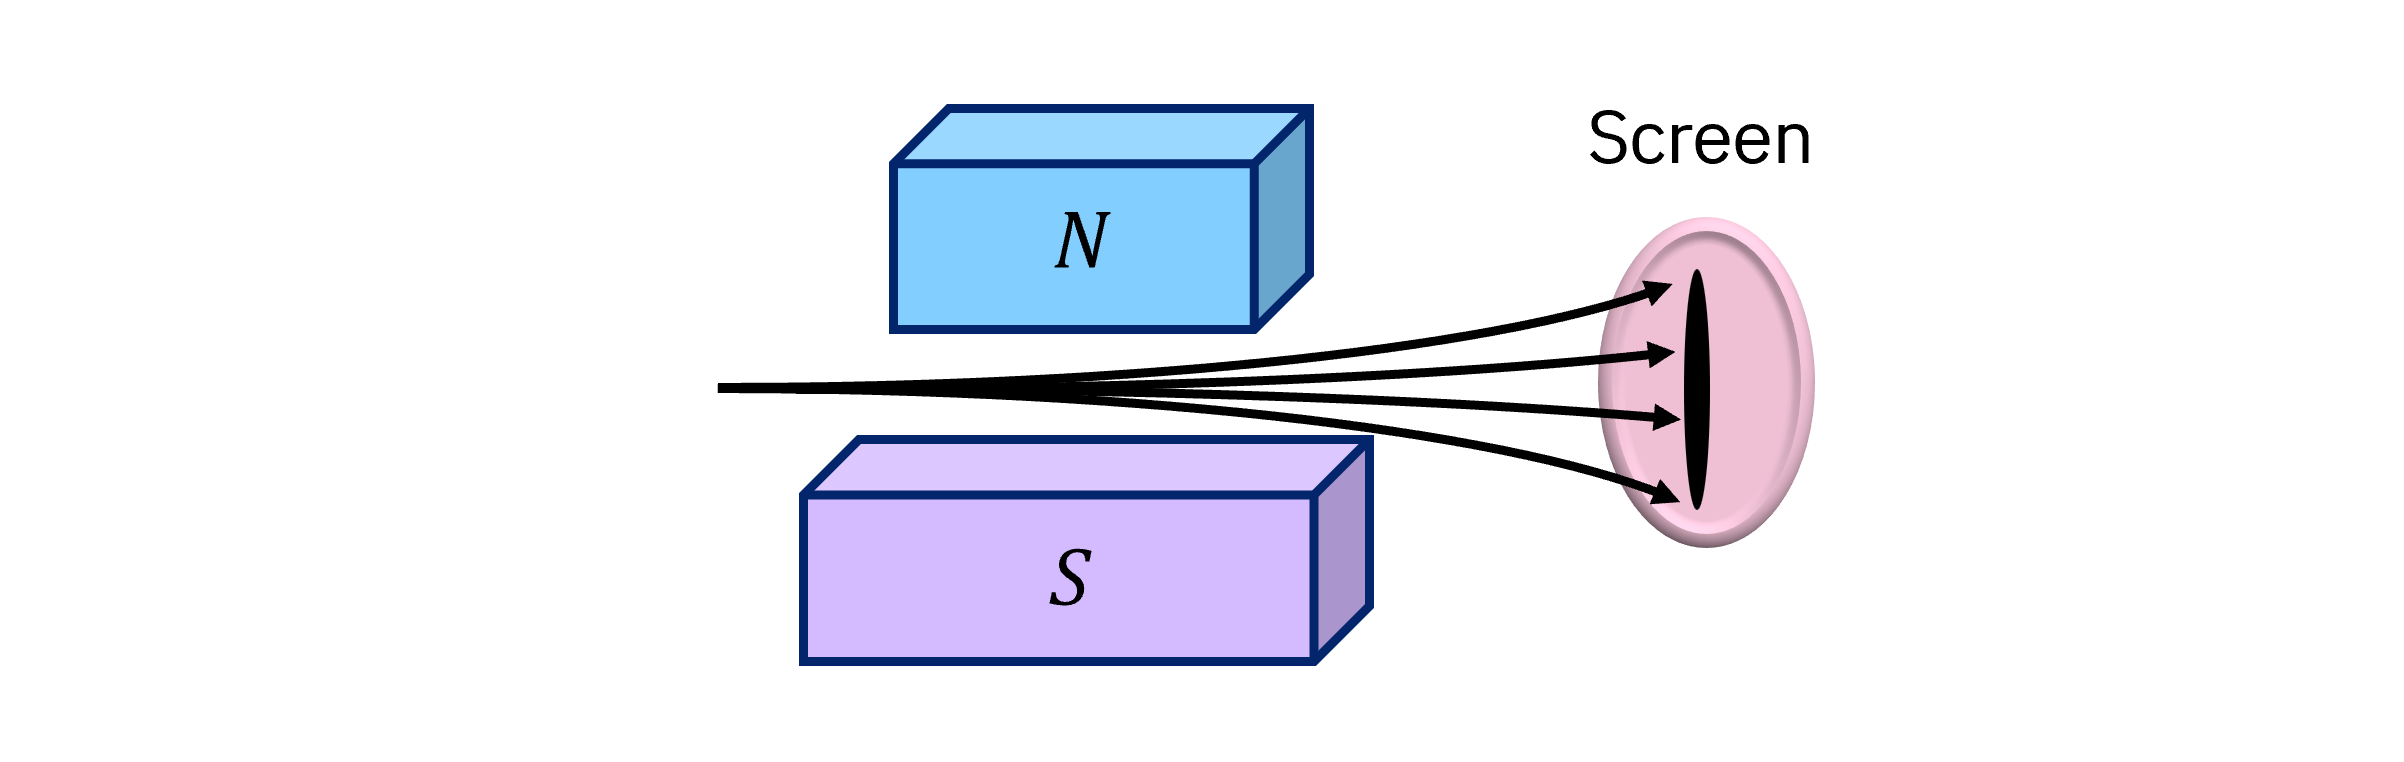

</details>

## What would quantum mechanics predict?

Perhaps the strangest of all possibilities would be the following: What if the angular momentum of the electron were quantized, but also its projection on some axis were also quantized? The quantization of angular momentum as a magnitude is interesting, but one might try to argue through it using classical intuition, the way planetary orbits settled into fixed paths that don't cross each other, having only certain allowed angular momenta. But what if that angular momentum vector could only point exactly along $z$ or exactly opposite $z$, but not have any other component along $z$? What if then when measured along a different direction, the vector could only point entirely along $x$ or entirely opposite $x$, and nothing in between? That would be strange in a way that confounds all classical intuition.

### Check-in question

What sort of distribution of particles on a screen would you expect to find in this last case, where the projection of angular momentum along the direction of the field is quantized? Feel free to consider only particles that pass perfectly through the center of the device, or include those that veer slightly off center to where the gradient is weaker. Just be explicit.

<details>
<summary>Answer:</summary>

The particles in the center of the device would experience a single inhomogeneous field and would all be measured to have one of two orientations to their magnetic moments. So, they would either be deflected maximally with the gradient or maximally against the gradient, and nothing in between. Of course, off to either side, where the gradient is weaker, the deflection would be smaller. At very large lateral positions, they may be entirely outside the gradient, and there could be just a single region of undeflected particles.

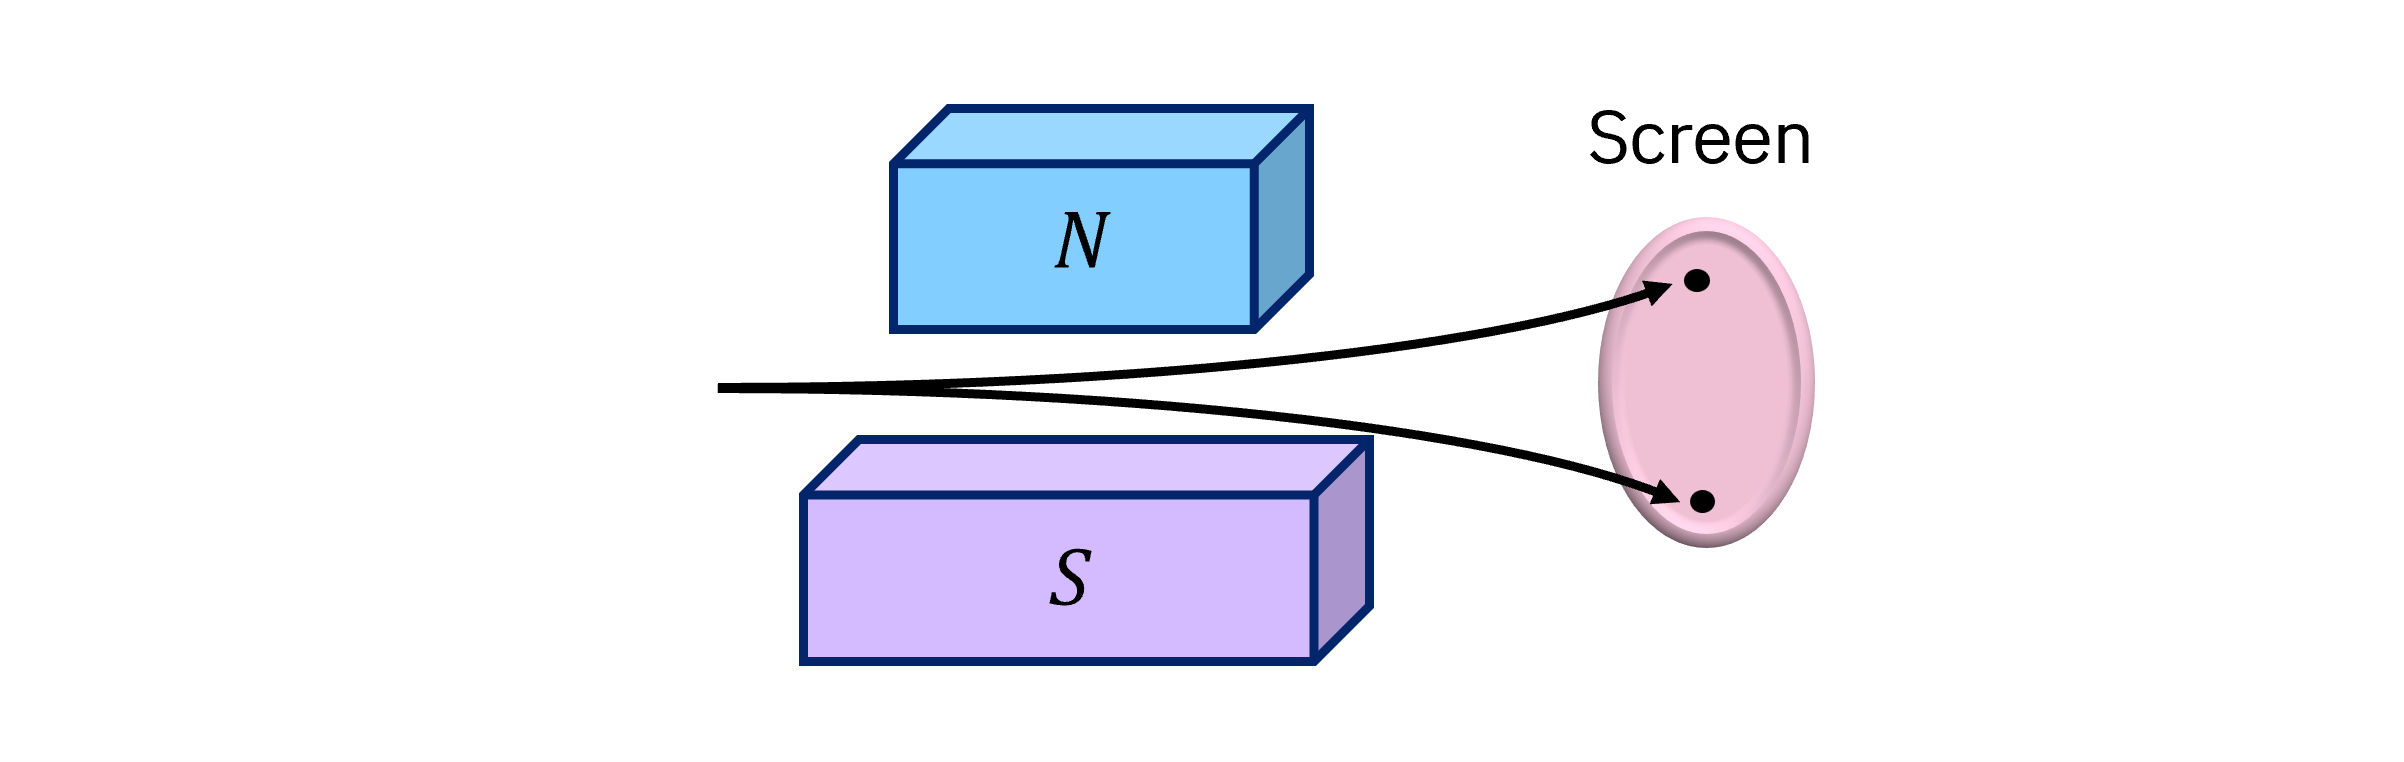

</details>

## How will qubits help us test this?

Most quantum computers use "qubits" - the quantum analogs of classical bits. More specifically, they are designed to be two-level systems, analogous to the "on"/"off" states of classical bits. Quantum computing paradigms do exist which make use of three-level systems (so called "qutrits") or many-level systems (called "qudits"). But most work is concentrated on qubits. In particular, IBM Quantum Computers use what are called fixed-frequency transmon qubits. These are quite a bit different from orbital or spin angular momentum of atoms. But like the spin of an electron, IBM qubits are quantum mechanical systems that can interact with light and on which measurements can be made. In fact, one often finds analogies made between states of quantum mechanical spin and computational states of a qubit. For example, one often sees the "spin-up" state associated with the computational 0 state, and "spin-down" associated with the computational 1 state:

$$|\uparrow\rangle \sim |0\rangle$$
$$|\downarrow \rangle \sim |1\rangle$$

We can use these similarities to observe quantum mechanical behavior in IBM Quantum Computers that mimics the quantum mechanical behavior of orbital or spin angular momentum in atoms. We will make similar observations using linear combinations of these states that allow us to extend the discussion to angular momentum along any direction.

## First experiment: A single measurement

In this first experiment and throughout the module, we will use a framework for quantum computing known as "Qiskit patterns", which breaks workflows into the following steps:

- Step 1: Map classical inputs to a quantum problem
- Step 2: Optimize problem for quantum execution
- Step 3: Execute using Qiskit Runtime Primitives
- Step 4: Post-processing and classical analysis

We will generally follow these steps, though we may not always explicitly label them.

### Step 1: Map classical inputs to a quantum problem

Here, the classical inputs are orientations of a spin prior to measurement in a Stern Gerlach device. Don't worry too much about the exact nature of the quantum state prior to measurement. That is the subject of a different Qiskit Classrooms module, on Bell's theorem.

Note that IBM quantum computers measure states along the $z$ axis. So this first experiment will be very much like the Stern Gerlach experiment with the magnetic field gradient along $z$. We will see how to change the system to measure along different directions, later.

Let's begin by making the analog of a spin state, that is, some mixture of $|\uparrow\rangle$ and $|\downarrow\rangle$ or equivalently of $|0\rangle$ and $|1\rangle$. We have proposed some initial values. But feel free to play with other values or even random values.

In [14]:
import random
from numpy import pi
import numpy as np

# Use these lines to choose your own arbitrary state vector and normalize it.
# a = 2
# b = (1+1j)
# norm = np.sqrt(a*np.conjugate(a)+b*np.conjugate(b))
# a = a/norm
# b = b/norm
# print(a,b)

# Use these lines if you would rather look at at random spin orientations.
a = random.random()
b = random.random()
norm = np.sqrt(a * np.conjugate(a) + b * np.conjugate(b))
a = a / norm
b = b / norm
print(a, b)

0.7877509768659391 0.6159938298771821


Now we will use the angles above as parameters in a quantum circuit. We are considering only one particle at a time, so we will use only one qubit in our circuit, and we will require only one classical register.

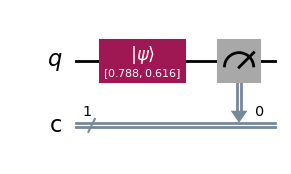

In [15]:
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit, Parameter

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Initialize the quantum state
qc.initialize([a, b])
qc.measure(0, 0)
qc.draw("mpl")

### Step 2: Optimize problem for quantum execution

To run our experiment on a real quantum computer, we need to load Qiskit Runtime Service, and select a quantum computer (or a "backend"). Below, we simply select the least busy quantum computer available to us.

In [ ]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService


# Syntax for first saving your token
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>", overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum')

# Syntax for specifying a channel and instance (if your organization has one for you.
service = QiskitRuntimeService(channel="ibm_quantum", instance="ibm-q/open/main")

In [ ]:
# Load the Runtime primitive and session
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

# Use the least busy backend
# backend = service.least_busy(operational=True, simulator=False, min_num_qubits = 127)
backend = service.least_busy()
print(backend.name)

We now must transpiled the circuit, meaning we must map our circuit onto the base gates available to our chosen quantum computer, and we want to optimize our circuit for running on that quantum computer.

In [17]:
# Transpile the circuit and optimize for running on the quantum computer selected
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
qc_ibm = pm.run(qc)

### Step 3: Execute using Qiskit Runtime Primitives

Now we want to run this on a real quantum computer. All the necessary syntax for that is in the code block below. If you have exhausted your allotted time on real quantum computers, or if you are without an internet connection, you can uncomment the next code block, which will run the code on a local simulator.

In [5]:
# Specify that we want to use only a single shot, to represent a single measurement of a spin in a SG device.
num_shots = 1

# Evaluate the problem using a QPU via Qiskit IBM Runtime
with Session(backend=backend) as session:
    sampler = Sampler(mode=session)
    dist = sampler.run([qc_ibm], shots=num_shots).result()
session.close()
counts = dist[0].data.c.get_counts()

Use the code below if you are unable to run the experiment on a real quantum computer.

In [ ]:
# This uses a local simulator
# from qiskit_aer import AerSimulator

# This generates a simulator that mimics the real quantum system
# backend_sim = AerSimulator.from_backend(backend)

# Import an estimator, this time from qiskit (we import from Runtime for real hardware)
# from qiskit.primitives import BackendSampler
# sampler = BackendSampler(backend = backend_sim)

# num_shots = 1

# This runs the job
# dist = sampler.run([qc_ibm], shots = num_shots).result()

# This selects measurement counts for the 0th circuit, which in this case is the only circuit
# counts=dist[0].data.c.get_counts()

### Step 4: Post-processing and classical analysis

For this very simple experiment, classical analysis just consists of visualizing the experimental outcome.

counts =  {'1': 1}


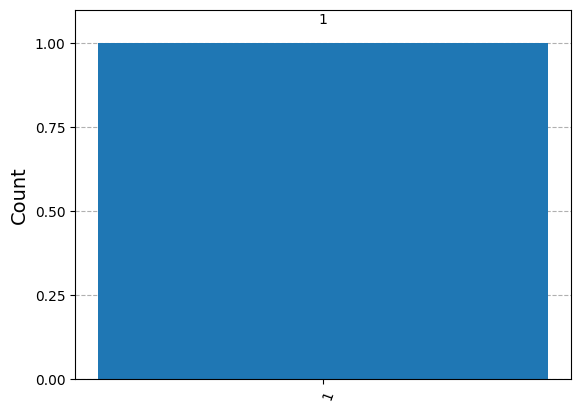

In [ ]:
from qiskit.visualization import plot_histogram

print("counts = ", counts)
plot_histogram(counts)

We made one measurement and obtained "0". This is no surprise for us. We know we are using a quantum computer composed of qubits and we're very accustomed to classical bits returning a 0 or a 1. But keep in mind: this is the quantum computing analog of the experiments done with particles with magnetic moments. If we had expected an even spread between 0 and +1, it might indeed have surprised us that we obtained one extremum on our first measurement. It is this surprising quantization of results in the Stern Gerlach experiment that led us to a better understanding of nature, and that in turn helped us eventually build quantum computers.

Let's see what happens when we make an ensemble of measurements.

# Second experiment: Measuring many particles

To gather statistics on many such measurements, we don't need to repeat steps 1 & 2. We can simply increase the number of shots in our experiment. Feel free to play with the number of shots in the instance of step 3 below.

In [ ]:
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

num_shots = 100

# Evaluate the problem using a QPU via Qiskit IBM Runtime
with Session(backend=backend) as session:
    sampler = Sampler(mode=session)
    dist = sampler.run([qc_ibm], shots=num_shots).result()
session.close()
counts = dist[0].data.c.get_counts()

As before, if you are unable to run on a real quantum computer, uncomment the block above from the first experiment, and simply change ```num_shots = 1``` to ```num_shots = 100``` or more.

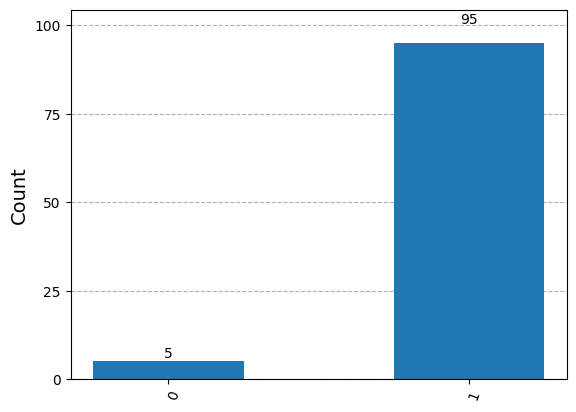

In [8]:
plot_histogram(counts)

We see that we sometimes measure 0 and sometimes measure 1. Note that we never measure anything else! You could change the number of shots, and notice that the probability of measuring 0 or 1 seems to be fairly consistent between different runs with different numbers of shots. So, something about the preparation of the state seems to be determining the probability of measurement outcomes, although any one measurement could yield either 0 or 1.

## Third experiment: Random spins in an oven

In the Stern Gerlach experiment, the researchers didn't get to specify an angle at which an angular momentum vector would emerge from the oven. The orientations were random (or something even more mysterious! See the Qiskit Classroom module on Bell's theorem). A reasonable analog of that experiment would be for us to randomly initialize the states of our qubit and make measurements many times.

### Step 1: Map classical inputs to a quantum problem

The circuit we want to construct is the same as before. The only difference is that this time, we will construct the circuit using gates with free parameters $\theta$ and $\phi$. Numerical values for those parameters will then be assigned for each new run.

<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1754/2671281646.py:4: SyntaxWarning: invalid escape sequence '\p'
  phi = Parameter("$\phi$")


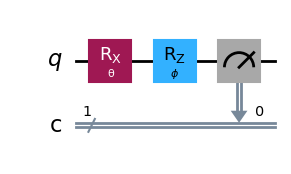

In [18]:
# from qiskit.circuit import QuantumCircuit, Parameter

theta = Parameter("θ")
phi = Parameter("$\phi$")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Add rotation gates for rotating the state of qubit 0 to random orientations
qc.rx(theta, 0)
qc.rz(phi, 0)
qc.measure(0, 0)

qc.draw("mpl")

Running a quantum circuit for only a single shot and doing so for many random configurations is an unusual workflow for a quantum computer. It can certainly be done, but for simplicity, we will use a local simulator here.

In [ ]:
# Use a local simulator

from qiskit_aer import AerSimulator
# Import an estimator, this time from qiskit (we will import from Runtime for real hardware)
from qiskit.primitives import BackendSamplerV2

# Generate a simulator that mimics the real quantum system
backend_sim = AerSimulator.from_backend(backend)

sampler = BackendSamplerV2(backend=backend_sim)

In [42]:
# A list to store the accumulated probabilities of the two possible measurement outcomes.
probslist = {"0": 0.0, "1": 0.0}

# Choose how many "particles"/measurements
measurements = 100
num_shots = 1

for i in range(measurements):
    # Assign a random orientation for each measurement
    phi = random.random() * 2 * pi
    theta = random.random() * 2 * pi

    angles = [phi, theta]
    circuit = qc.assign_parameters(angles)
    qc_ibm = pm.run(circuit)

    # Run the circuit
    # job = sampler.run([circuit],num_shots = 1)
    dist = sampler.run([qc_ibm], shots=num_shots).result()

    # Update the list of probabilities
    zeroterm = dist[0].data.c.get_counts().get("0") or 0
    oneterm = dist[0].data.c.get_counts().get("1") or 0
    probslist.update({"0": probslist.get("0") + zeroterm})
    probslist.update({"1": probslist.get("1") + oneterm})

probslist.update({"0": probslist.get("0") / measurements})
probslist.update({"1": probslist.get("1") / measurements})
# print(probslist)

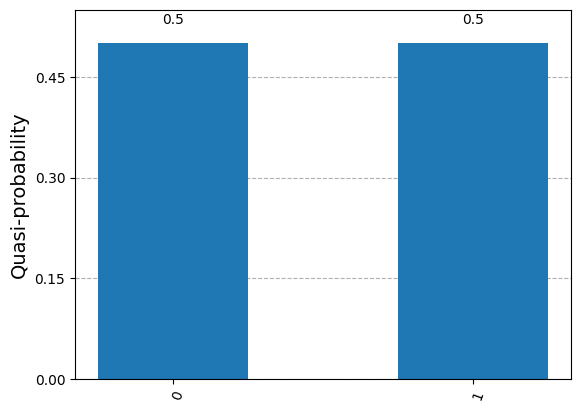

In [ ]:
plot_histogram(probslist)

So we see that the random initial state of the qubits (corresponding to random orientations of the angular momentum in a Stern Gerlach experiment) yield similar numbers of 0 and 1 states (like similar numbers of spin up and spin down states). This is exactly what the original Stern Gerlach experiment showed.

## Fourth experiment: Repeated measurements

When a qubit starts in a random state, we see there is a roughly 50-50 chance of measuring one extremum over the other. But what happens to the qubit's state (or the particle's angular momentum) after the measurement? To answer that, we'll need to define a circuit that allows us to make multiple measurements of the same qubits. Let us define a circuit that we can use to investigate this. We will want to allow for the possibility of measuring both states $|0\rangle$ and $|1\rangle$, so we need something to rotate the qubit's initial state away from the default $|0\rangle$ state. In this case, we will use a hadamard gate $H$, since $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$. Note that, by default, both of these measurements will be along $z$.

In [46]:
from qiskit import QuantumCircuit

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)

# Initialize the qubit to be a mixture of 0 and 1 states.
qc.h(0)

# Add a first measurement
qc.measure(0, 0)
qc.barrier()

# Add a second measurement
qc.measure(0, 1)

qc.draw("mpl")

qc_ibm = pm.run(qc)

In [52]:
# Step 3: Run the job

# job = sampler.run([qc])
num_shots = 1000
dist = sampler.run([qc_ibm], shots=num_shots).result()
counts = dist[0].data.c.get_counts()
print(counts)

{'11': 509, '00': 474, '01': 7, '10': 10}


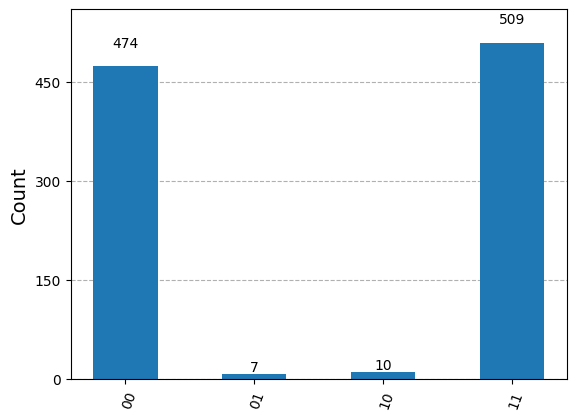

In [53]:
# Step 4: Post-process
plot_histogram(counts)

In the figure above, the bins are labelled "00", "01" and so on. Here, these numbers refer to "2nd outcome, 1st outcome". So "00" means both measurements yielded the $|0\rangle$ state, and "01" means the first measurement yielded $|1\rangle$, and the second yielded $|0\rangle$. The vast majority of qubits were either measured to be in $|0\rangle$ twice, or measured to be $|1\rangle$ twice. It was very rare for qubits to be measured in one state and then measured to be in another state, and the few cases in which that happened (~1%) are due to noise. In this case that noise has been simulated in keeping with the behavior of the real quantum system. This observed correlation between successive measurements is also observed in Stern-Gerlach-type measurements of particles with spin angular momentum. If a particle is measured to be "spin-up", a subsequent measurement shortly after that will once again yield "spin-up" (up to some small variation due to noise).

This may seem trivial. After all, if a qubit is measured to be in one state, and then I measure it again, quickly, why wouldn't it still be in that state? But if we really latch on to this subtlety, it may help us select some mathematical tools to describe this phenomenon.

## Analysis of experiments thus far

Let's collect a few observations from our experiments so far:
- The measurement of a quantum mechanical system will only yield one of a set of "allowed values". For two-level systems like qubits or spin-1/2 particles, a measurement will only yield one of the binary outcomes.
- When we randomly initialize the state of our binary system (like spin-1/2 particles emerging from an oven), either of the binary measurement outcomes is possible.
- Once a measurement is made and the state of the system is known, repeating the measurement of the same physical observable does not change the state! That is, if we obtain the 0 state once, when we measure again it is still in the 0 state (up to some minor noise in the system ~0.1% to 1%).

Take explicit notice that we have not yet addressed the probabilistic nature of quantum mechanics, nor said anything about "collapsing" the state to an eigenstate. Using only the observations above, it might be tempting to look for a mathematical operation $O$ that leaves some special set of quantum mechanical states $|\psi\rangle$ unchanged up to perhaps a constant: $O|\psi\rangle = c|\psi \rangle$, since measuring along $z$ twice yields the same result. Ultimately, that search will fail to describe all the behaviors we will see. But it can describe some things, so we will pursue it a bit longer.

There does exist such an operation. Matrix operation on some vectors changes the vectors, and matrix operation on other vectors (eigenvectors) leaves the vector unchanged up to a constant. Take for example the matrix $M$ and the vector $|v\rangle$ where
$$M= \begin{pmatrix} 1 & 2 \\ 2 & 1\end{pmatrix}$$
and
$$|v\rangle = \begin{pmatrix} 1\\1 \end{pmatrix}$$
Note that
$$M|v\rangle= \begin{pmatrix} 1 & 2 \\ 2 & 1\end{pmatrix}\begin{pmatrix} 1\\1 \end{pmatrix} = \begin{pmatrix} 1*1+2*1\\2*1+1*1 \end{pmatrix} = \begin{pmatrix} 3\\3 \end{pmatrix} = 3|v\rangle$$
But for other vectors, say $|v'\rangle = \begin{pmatrix} 1\\2\end{pmatrix}$, we have
$$M|v'\rangle= \begin{pmatrix} 1 & 2 \\ 2 & 1\end{pmatrix}\begin{pmatrix} 1\\2 \end{pmatrix} = \begin{pmatrix} 1*1+2*2\\2*1+1*2 \end{pmatrix} = \begin{pmatrix} 5\\4 \end{pmatrix} \neq c|v'\rangle$$
We might try to describe the spin of a particle using a matrix, and we might try to describe the states of the particles after measurement using a vector, called a "state vector". It is not at all obvious what values should go into such a matrix or state vector, but the only property we have from the measurements so far that we could use to label states would be the probability of measuring 0 or 1 ("spin-up" or "spin-down" in the context of spin-1/2 particles). We should consider that the entries in the state vectors should be related to this probability (exactly the probability, "probability amplitude" - meaning we square the entry to obtain the probability, etc.). But at this point, we're not sure if the entries in these matrices should be strictly real, complex, or what. To be safe, let's attempt to develop a framework in which the vectors and matrices satisfy the following:
- The matrix operators are connected to experiment as much as possible. For example, we could associate the eigenvalues of a spin matrix with the experimentally observed spin projections.
- The state vectors should be connected to probability in the following way: If a particle is in the state vector $|A\rangle$, the probability that a subsequent measurement will find the particle in the state $|B\rangle$ is $P_{AB}\equiv |\langle A| B \rangle|^2$.

This gives us a ton of freedom in developing our first matrices. For example, we could naively try

$$|0\rangle \sim |\uparrow\rangle \sim \begin{pmatrix} 1 \\0 \end{pmatrix}$$

Here the $|0\rangle \sim |\uparrow\rangle$ means that there are states in quantum computers and in spin-1/2 systems that are very similar and are often mapped to each other. They are obviously not exactly the same, since they refer to different systems. But the algebra describing these two-state systems could conform to the same rules (spoiler alert: they do!). Note that this random choice already has one nice attribute. Note that

$$P_{00} = |\langle 0| 0 \rangle|^2 = \vert \begin{pmatrix} 1 & 0\end{pmatrix} \begin{pmatrix} 1 \\ 0\end{pmatrix}\vert ^2 = |1|^2 = 1$$

That is, if a particle is already in the state $|0\rangle$, the probability that a subsequent measurement will also yield $|0\rangle$ is 1 (barring effects from noise). This is excellent, because we have already seen that once a state is in the 0 or "spin-up" state, it remains there upon subsequent measurement. The probability above should indeed be 100%.

### Check-in question

Why is

$$|0\rangle = \begin{pmatrix} 1 \\0 \end{pmatrix}$$

a better choice than, say,

$$|0\rangle = \begin{pmatrix} 2 \\0 \end{pmatrix}?$$

<details>
<summary>Answer:</summary>

Our attempt to associate the probability of a measurement with the inner product squared means we need the magnitude of each vector to be 1. That is, $|\langle v|v\rangle|^2 = 1$ for all $|v\rangle$, since the probability of a thing in state $|v\rangle$ being in state $|v\rangle$ is 100%. This is known as the "normalization condition".
</details>

### Check-in question

Why is

$$|0\rangle = \begin{pmatrix} 1 \\0 \end{pmatrix}$$

a better choice than, say,

$$|0\rangle = \begin{pmatrix} 0 \\1 \end{pmatrix}?$$

<details>
<summary>Answer:</summary>

It is not. There is no reason why we need to initially choose $|0\rangle = \begin{pmatrix} 1 \\0 \end{pmatrix}$. Rather, it is a convention. However, once we make that choice, it does impose certain constraints on subsequent choices. See below.
</details>

Recall that in the experiments above, we found that a qubit initially in a the state $|0\rangle$ remained in that state upon subsequent measurement. The same is true of $|1\rangle$. This means that a qubit that is in $|0\rangle$ has zero probability of being measured in the state $|1\rangle$ (barring the effects of noise). Our required connection between inner products and probabilities of measurements then tells us that

$$P_{01} = P_{10}=0$$

Without loss of generality, we can write the state vector $|1\rangle = \begin{pmatrix} a \\ b \end{pmatrix}$. Then we can write

$$P_{01} = |\langle 0| 1 \rangle|^2 = \vert \begin{pmatrix} 1 & 0\end{pmatrix} \begin{pmatrix} a \\ b\end{pmatrix}\vert ^2 = |a|^2 = 0$$

The requirement that $P_{11} = 1$, the so-called "normalization condition" tells us that $|b|^2=1$. This by itself really only limits us to $b=e^{i\phi}$ for $\phi \in \mathbb{R}$. It turns out there are other reasons for choosing $b=1$ that are beyond this introduction to the topic. For now, let it suffice that $b=1$ is one acceptable solution.

We have come quite far in our analysis. Choosing a form for our state vectors allows us to construct a matrix that describes something about the physical phenomena at work here. In particular, because the original Stern-Gerlach experiment measured a splitting of trajectories based on spin angular momentum components along the $z$ axis, we would like an operator that describes exactly that: $S_z$. Another key connection to the experiment is that from the deflection amount, travel time, and known magnetic field strength, we can determine the magnitude of the $z$ component of spin. Although this requires a lot of assumptions about the precision of the experimental setup, here we will simply reiterate that the measured z-components of spin angular momentum are $\pm \hbar/2$.

Then we are seeking a matrix with real eigenvalues (satisfied by Hermitian matrices) with eigenvalues corresponding to these experimentally-observed spin components. Without loss of generality, we can write $S_z = \begin{pmatrix} s_{11} & s_{12} \\ s_{21} & s_{22}\end{pmatrix}$, and we can require:

$$S_z |\uparrow\rangle = \begin{pmatrix} s_{11} & s_{12} \\ s_{21} & s_{22}\end{pmatrix}\begin{pmatrix}1 \\0\end{pmatrix} = \begin{pmatrix} s_{11} \\ s_{21} \end{pmatrix} \overset{!}{=} \frac{\hbar}{2} \begin{pmatrix}1 \\0\end{pmatrix} \rightarrow s_{11} = \hbar/2,s_{21}=0$$
$$S_z |\downarrow\rangle = \begin{pmatrix} s_{11} & s_{12} \\ s_{21} & s_{22}\end{pmatrix}\begin{pmatrix}0 \\1\end{pmatrix} = \begin{pmatrix} s_{12} \\ s_{22} \end{pmatrix} \overset{!}{=} -\frac{\hbar}{2} \begin{pmatrix}0 \\1\end{pmatrix} \rightarrow s_{12} = 0, s_{22}=-\hbar/2$$

Combining, and pulling out the overall factor of $\hbar/2$, we have

$$ S_z = \frac{\hbar}{2} \begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}. $$

This is the well-known spin-z operator found in all quantum mechanics textbooks. One often sees this with the $\hbar/2$ removed, in which case it is the "Pauli-z" operator, typically denoted $\sigma_z$:

$$\sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}. $$

This is useful, since this Pauli operator (and related matrices) can describe many physical systems involving two levels or two possible outcomes of measurement, including states of transmon qubits in a quantum computer.

Before we turn to other operators and states related to this one, we must address one fact that a lot of people get wrong. __Operator action is not the same as measurement.__ In one sense, you might say, "Of course not! One happens on paper as part of a mathematical calculation, and the other happens in a lab on physical systems." Yes, that's true, but it's more than that. Making a measurement of the $z$-component of spin will always yield a "spin-up" or "spin-down" state, regardless of the initial state of the system. We saw this with the quantum computing analogs $|0\rangle$ and $|1\rangle$. We initialized states to be in hundreds of random orientations, and measurements always yielded either $|0\rangle$ or $|1\rangle$. This is known as measurement "collapsing the state" to an eigenstate. This does not happen when you apply a matrix to a state. Try the questions below to explore this.

### Check-in question

Suppose you start with a particle in a spin state

$$|\psi\rangle = \begin{pmatrix}\sqrt{3/5} \\ \sqrt{2/5}\end{pmatrix}.$$

(a) What do you get if you act with the $S_z$ operator on this state vector? (b) What do you obtain if you make a single measurement of the $z$ component of spin of this particle? (c) What do you get if you prepare many particles identical to this state and make thousands of measurements of the $z$ component of the spin?
<details>
<summary>Answers:</summary>

(a) You get

$$S_z |\psi\rangle = \frac{\hbar}{2} \begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix} \begin{pmatrix}\sqrt{3/5} \\ \sqrt{2/5}\end{pmatrix}$$
$$= \frac{\hbar}{2} \begin{pmatrix}\sqrt{3/5} \\ -\sqrt{2/5}\end{pmatrix}.$$

That's it. There is no experimental outcome. You just apply the matrix to the vector and you got a slightly different vector which now has a new "-" sign, and no longer has a magnitude of 1, since it has a prefactor $\hbar/2$.

(b) You will either obtain $|\uparrow\rangle$ or $|\downarrow\rangle$. This corresponds to observing a projection of spin on the $z$ axis of either $\hbar/2$ or $-\hbar/2$, respectively. We can also determine the probability of each outcome, since
$$P_{\uparrow\psi}=|\langle \uparrow|\psi\rangle|^2 = \vert \begin{pmatrix}1 & 0\end{pmatrix} \begin{pmatrix}\sqrt{3/5} \\ \sqrt{2/5}\end{pmatrix}\vert^2 = |\sqrt{3/5}|^2 = \frac{3}{5}$$
$$P_{\downarrow\psi}=|\langle \downarrow|\psi\rangle|^2 = \vert \begin{pmatrix}0 & 1\end{pmatrix} \begin{pmatrix}\sqrt{3/5} \\ \sqrt{2/5}\end{pmatrix}\vert^2 = |\sqrt{2/5}|^2 = \frac{2}{5}$$
So while the spin-up state is 20% more likely, either outcome is possible, and we will only obtain one of these two states.

(c) Roughly 60% of the measurements will yield spin-up particles, and roughly 40% of the measurements will yield spin-down particles, according to the measurement probabilities calculated in part (b).

</details>

### Check-in question

Verify the answers to parts (b) and (c) of the previous question by using the analogy between spin-up states of an atom and qubit states:

$$|\uparrow\rangle\sim|0\rangle.$$

Code quantum circuits to create the desired initial state, and then use either real hardware or a simulator to check the outcomes of a single measurement, and from an ensemble of hundreds or even thousands of measurements.

<details>
<summary>Answer:</summary>

```#Use the backend sampler for part (b) because it allows us to use a single shot.
from qiskit_aer import AerSimulator
backend_sim = AerSimulator.from_backend(backend)
from qiskit.primitives import BackendSampler
sampler = BackendSampler(backend = backend_sim)

#Create a quantum circuit to initialize the state.
import math
psi = [math.sqrt(3/5),math.sqrt(2/5)]
qc = QuantumCircuit(1,1)
qc.initialize(psi, [0])

#Add measurement to the circuit
qc.measure(0,0)
qc.draw('mpl')

#Set num_shots =1 for part (b) and num_shots = 1000 or more for part (c).
num_shots = 1000

#Run the job and print the result. You should obtain only 0 or 1 in part (b) for a single shot.
#You should obtain a probability distribution with approximately 60% 0 and 40% 1 in part (c)

dist = sampler.run([qc_ibm], shots = num_shots).result()
counts=dist[0].data.c.get_counts()
print(counts)```

#You should obtain {0: 599, 1: 401} or something equivalently close to the 60%-40% distribution predicted.

## Fifth experiment: Measuring different observables

So far we have only made measurements along the z axis. In a Stern-Gerlach experiment, if we wanted to measure along, say, the x-axis we would simply orient the inhomogeneous magnetic field to point along the $x$ axis, and look for deflections along $x$ on the screen. IBM Quantum Computers, however, are designed to make measurements along only one axis ($z$). To measure a state along $x$ we must perform a "change of basis". This means we must perform an operation that takes states along $x$ in the Bloch sphere to $z$, and vice-versa. There are a few ways of implementing this, but the preferred way is a Hadamard gate:
$$
H=\frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}
$$

### Check-in question:

Show that $H|0\rangle = |+\rangle_x$ and that $H|+\rangle_x = |0\rangle$

<details>
<summary>Answer:</summary>

$$H|0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}\begin{pmatrix}1 \\ 0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix} = |+\rangle_x$$
$$H|+\rangle_x = \frac{1}{\sqrt(2)}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix} = \frac{1}{2}\begin{pmatrix}2 \\ 0\end{pmatrix} = \begin{pmatrix}1 \\ 0\end{pmatrix} = |0\rangle$$

</details>

### Check-in question:

Show that $H|1\rangle = |-\rangle_x$ and that $H|-\rangle_x = |1\rangle$

<details>
<summary>Answer:</summary>

$$H|1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}\begin{pmatrix}0 \\ 1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix} = |-\rangle_x$$
$$H|-\rangle_x = \frac{1}{\sqrt(2)}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix} = \frac{1}{2}\begin{pmatrix}0 \\ 2\end{pmatrix} = \begin{pmatrix}0 \\ 1\end{pmatrix} = |1\rangle$$

</details>

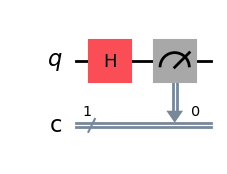

In [54]:
# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Add a hadamard gate to rotate into the x-basis
qc.h(0)
qc.measure(0, 0)

qc.draw("mpl")

This circuit rotates our system so that measurements (along $z$) tell us about the $x$ characteristics prior to the rotation. We already know that the quantum computer initializes states to $|0\rangle$ which corresponds to $|\uparrow\rangle$. Let's see what happens when we measure the projection of spin along $x$ for a state initially in $|\uparrow\rangle$.

In [55]:
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler()

job = sampler.run([qc], shots=10000)
print(job.result()[0].data.c.get_counts())

{'1': 5061, '0': 4939}


This shows us that for a qubit initially in $|0\rangle$ (or equivalently, a spin in the $|\uparrow\rangle$) the probability of measuring a projection along $+x$ or $-x$ is about 50-50. In some ways, this makes perfect sense. After all, if something were pointing along the z direction, it would have no particular preference for $\pm x$. We might expect the same to be true, if we start with the state $|1\rangle$ (or $|\downarrow\rangle$). Let's check:

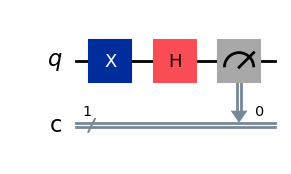

In [56]:
# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Add a NOT gate and hadamard gate. Measure.
qc.x(0)
qc.h(0)
qc.measure(0, 0)

qc.draw("mpl")

In [57]:
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler()

job = sampler.run([qc], shots=10000)
print(job.result()[0].data.c.get_counts())

{'1': 5025, '0': 4975}


Yes! Again, we find a 50-50 probability of measuring a projections along $\pm x$. In analogy with measurements along $z$, we might further suspect that a particle that collapses into a state definitely along $+x$ might have zero probability of subsequently being measured along $-x$. Let's check:

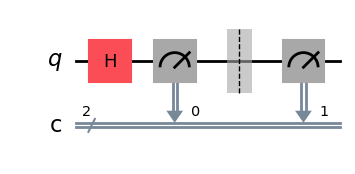

In [58]:
from qiskit import QuantumCircuit

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)

# Rotate into x-basis using a Hadamard gate, then make two measurements in succession
qc.h(0)
qc.measure(0, 0)
qc.barrier()
qc.measure(0, 1)

qc.draw("mpl")

{'00': 526, '11': 498}


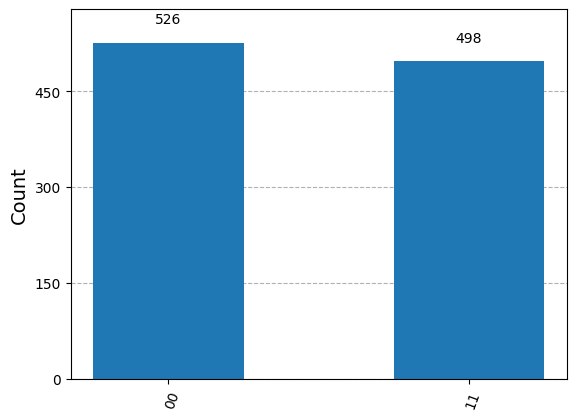

In [59]:
job = sampler.run([qc])
print(job.result()[0].data.c.get_counts())
plot_histogram(job.result()[0].data.c.get_counts())

As expected, we obtain results in which the projection is along $+x$, and then later is again along $+x$, and we have results in which the projection is initially along $-x$ and is later along $-x$ once again. We do not see cases where the projection switches from $+x$ to $-x$ or vice-versa. We can collect our observations and use them to develop further operators in matrix forms, and further state vectors.

We know:
- States with definite projections along $+z$ or $-z$ have a 50% chance of being found to have a projection along $+x$ and 50% chance of having a projection along $-x$.
- States with a definite projection along $+x$ have zero chance of later being found to have a projection along $-x$, and vice-versa.

We can use these results to construct states with a definite, positive projection along $x$ (which we call $|+x\rangle$), and those with definite, negative projection along $x$ (which we call $|-x\rangle$). From those states, we can construct the matrix corresponding to $S_x$, exactly as we did for $S_z$. We leave these as exercises to the learner. Similarly, one can construct experiments making measurements along the $y$ axis, determine vectors for $|+y\rangle$ and $|-y\rangle$, and finally obtain an expression for $S_y$.

Collecting all these vectors and matrices together, we have

\begin{aligned}
|+x\rangle &= \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix} & \:  & |-x\rangle &=& \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix} & \: &S_x &=& \frac{\hbar}{2} \begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix}\\
|+y\rangle &= \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ i\end{pmatrix} & \:  & |-y\rangle &=& \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -i\end{pmatrix} & \: &S_y &=& \frac{\hbar}{2} \begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix}\\
|+z\rangle &= \begin{pmatrix}1 \\ 0\end{pmatrix} & \:  &|-z\rangle &=& \begin{pmatrix}0 \\ 1\end{pmatrix} & \: &S_z &=& \frac{\hbar}{2} \begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix}\\
\end{aligned}

## Questions

### Critical concepts:

- For spin-1/2 particle, a measurement of the projection of spin on some axis can only yield one of two outcomes, often called "up" and "down".
- Qubits can only be measured in one of two states, often referred to as $|0\rangle$ and $|1\rangle$.
- We can model the Stern Gerlach experiment on spin-1/2 particles using qubits in a quantum computer.
- Repeated measurements of the same physical observable of the same particle/qubit will yield the same result (unless the system is perturbed by noise).
- We can use results from the Stern Gerlach experiment or from the analogous experiments with quantum computers to derive a system of state vectors and matrix operators that describe quantum mechanical spin.

### T/F questions:

1. T/F Starting from experimental observations, the only valid choice for a vector to represent $|\uparrow\rangle$ is $\begin{pmatrix}1 \\ 0\end{pmatrix}$
2. T/F If $|\uparrow\rangle = \begin{pmatrix}1 \\ 0\end{pmatrix}$, the only choice for $|\downarrow\rangle$ is $\begin{pmatrix}0 \\ 1\end{pmatrix}$ (up to a global phase).
3. T/F A particle measured to be in the state $|0\rangle$ will continue to be found in the state $|0\rangle$ upon subsequent measurements along $z$.
4. T/F A particle measured to be in the state $|0\rangle$ will continue to be found in the state $|0\rangle$ upon subsequent measurements along $x$.
5. T/F A particle measured to be in the state $|0\rangle$ will always be found in the state $|+\rangle_x$ upon subsequent measurements along $x$.

### MC questions:

1. A particle initially in $|\uparrow\rangle$ has what probability of being measured in the state $|+x\rangle$?
    - a. 0%
    - b. 25%
    - c. 50%
    - d. 71%
    - e. 100%

2. A particle initially in $|\uparrow\rangle$ has what probability of being measured in the state $|\downarrow\rangle$?
    - a. 0%
    - b. 25%
    - c. 50%
    - d. 71%
    - e. 100%

2. The state $|\uparrow\rangle$ of a spin-1/2 particle is most commonly associated with what quantum computing state?
    - a. $|+\rangle$
    - b. $|-\rangle$
    - c. $|0\rangle$
    - d. $|1\rangle$
    - e. None of the above


### Discussion questions:

1. Three friends are discussing quantum measurements and operators. Friend A says, "Making a measurement along $z$ and acting with the operator $\sigma_z$ are the same thing." Friend B says, "Well, they are different procedures, but they have the same result." Friend C says, "They are totally different; they even have different effects on most states." With whom do you agree and why?

### Free response problems:

1. Given the experimental observations and proposed syntax:

$$P_{\uparrow+x}=\vert \begin{pmatrix}1 & 0\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |a|^2 =\frac{1}{2} $$
$$P_{\downarrow+x}=\vert \begin{pmatrix}0 & 1\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |b|^2 =\frac{1}{2} $$

show that up to a global phase

$$|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ e^{i\alpha}\end{pmatrix}$$

Choose $\alpha = 0$ to obtain the standard result.

2. Given the experimental observations and proposed syntax:

$$P_{\uparrow-x}=\vert \begin{pmatrix}1 & 0\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |a|^2 =\frac{1}{2} $$
$$P_{\downarrow-x}=\vert \begin{pmatrix}0 & 1\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |b|^2 =\frac{1}{2} $$

And using the result from challenge problem 3:

$$P_{+x-x}=\vert \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\end{pmatrix}\begin{pmatrix}c \\ d\end{pmatrix}\vert^2 = \frac{1}{2}|c+d|^2 =0 $$

show that up to a global phase

$$|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix}$$

## Acknowledgements

[1] By Tatoute - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=34095239